<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Regression_MLP_Using_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#build a sequential api for regression.
#diff from categorical: one output, l2 loss, no activation function

#Housing Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

Pull CA Housing Data as DataFrame. Target is median house value.

In [ ]:
#fetch data
housing = fetch_california_housing(as_frame=True)
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Split the housing frame into data and target frames.

In [ ]:
housing_data = housing.data
housing_target = housing.target
display(housing_data.head(),
housing_target.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

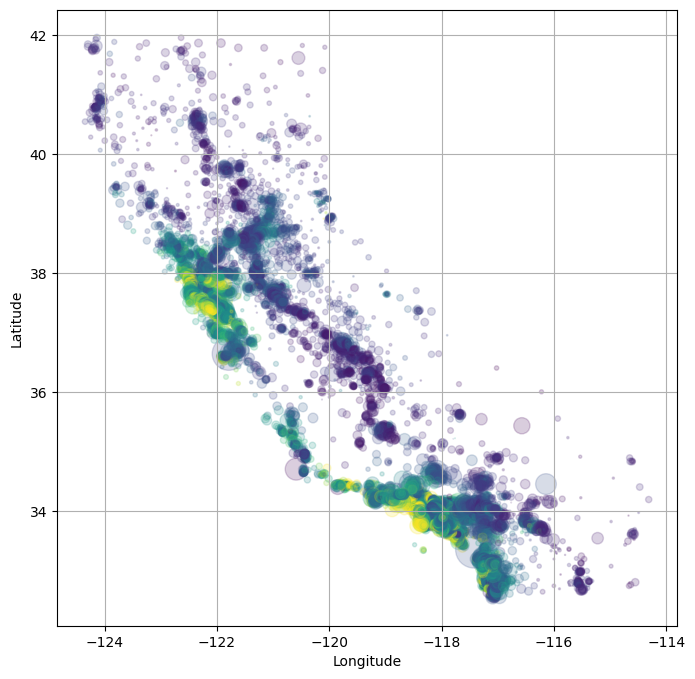

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(housing_data['Longitude'],
            housing_data['Latitude'],
            s=housing_data['Population']/50,
            alpha=0.2,
            c=housing_target)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.grid(True)

Split data into training and test sets.

In [ ]:
#split data set in to train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(housing_data, housing_target)

Split training data into a training subset and a validation subset.

In [ ]:
#split training set into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

Center each column about its mean and normalize to unit stddev

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Build a single layer sequential model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 4s 8ms/step - loss: 1.3707 - val_loss: 0.6564
Epoch 2/20
363/363 [==============================] - 4s 11ms/step - loss: 0.4639 - val_loss: 0.4219
Epoch 3/20
363/363 [==============================] - 3s 10ms/step - loss: 0.4101 - val_loss: 0.3959
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3922 - val_loss: 0.3815
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3884 - val_loss: 0.3791
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3811 - val_loss: 0.3808
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3815 - val_loss: 0.3819
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3777 - val_loss: 0.3896
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3764 - val_loss: 0.3663
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3715 - val_loss: 0.36

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3708


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


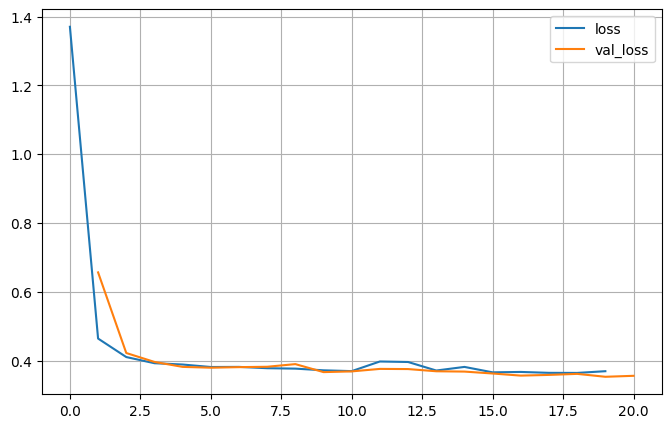

In [ ]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(8,5))
plt.plot(history_df.iloc[:,0], label=history_df.columns[0])
plt.plot(history_df.index + 1, history_df.iloc[:,1], label=history_df.columns[1])
plt.legend()
plt.grid(True)

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 98ms/step


array([[3.2571907],
       [2.72264  ],
       [1.6605933]], dtype=float32)

In [ ]:
y_test[:3]

16958    3.791
109      2.250
11719    1.583
Name: MedHouseVal, dtype: float64